In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from quantum_systems import ODQD, GeneralOrbitalSystem

<IPython.core.display.Javascript object>

In [4]:
l = 10
grid_length = 10
num_grid_points = 2001
omega = 0.25

odho = ODQD(
    l, grid_length, num_grid_points, a=0.25, alpha=1, potential=ODQD.HOPotential(omega)
)

<IPython.core.display.Javascript object>

\begin{align}
    \epsilon_i = \hbar \omega \left(i + \frac{1}{2}\right)
\end{align}

In [5]:
np.diag(odho.h)

array([0.1249998 +0.j, 0.37499902+0.j, 0.62499748+0.j, 0.87499542+0.j,
       1.12499515+0.j, 1.37501276+0.j, 1.62513397+0.j, 1.87570984+0.j,
       2.12783907+0.j, 2.38410631+0.j])

<IPython.core.display.Javascript object>

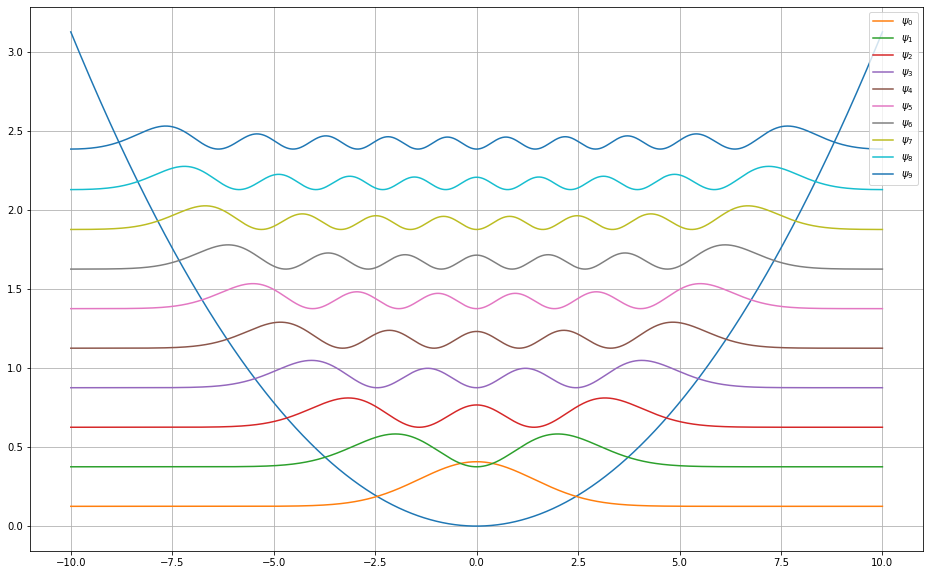

<IPython.core.display.Javascript object>

In [6]:
fig = plt.figure(figsize=(16, 10))

plt.plot(odho.grid, ODQD.HOPotential(omega)(odho.grid))

for i in range(l):
    plt.plot(
        odho.grid,
        np.abs(odho.spf[i]) ** 2 + odho.h[i, i].real,
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [10]:
print(f"l = {odho.l}")
print(f"grid shape = {odho.grid.shape}")
print(f"h shape = {odho.h.shape}")
print(f"u shape = {odho.u.shape}")
print(f"x shape = {odho.position.shape}")
print(f"spf shape = {odho.spf.shape}")

l = 10
grid shape = (2001,)
h shape = (10, 10)
u shape = (10, 10, 10, 10)
x shape = (1, 10, 10)
spf shape = (10, 2001)


<IPython.core.display.Javascript object>

In [12]:
system = GeneralOrbitalSystem(n=2, basis_set=odho, anti_symmetrize_u=True)

<IPython.core.display.Javascript object>

In [13]:
print(f"l = {system.l}")
print(f"grid shape = {system._basis_set.grid.shape}")
print(f"h shape = {system.h.shape}")
print(f"u shape = {system.u.shape}")
print(f"x shape = {system.position.shape}")
print(f"spf shape = {system.spf.shape}")

l = 20
grid shape = (2001,)
h shape = (20, 20)
u shape = (20, 20, 20, 20)
x shape = (1, 20, 20)
spf shape = (20, 2001)


<IPython.core.display.Javascript object>

__Note:__ `system.u` in the `GeneralOrbitalSystem` are the anti-symmetric Coulomb matrix elements.

\begin{align}
    \hat{H}
    &= \hat{t} + \hat{v} + \hat{u}
    = \hat{h} + \hat{u}
    = \sum_{i}\left(
        -\frac{1}{2}\frac{d^2}{dx^2}
        + \frac{1}{2}\omega^2 x^2
    \right)
    + \sum_{i < j} \frac{\alpha}{\sqrt{(x_i - x_j)^2 + a^2}}.
\end{align}

\begin{align}
    \hat{H} \Psi(x_1, \dots, x_N) = E \Psi(x_1, \dots, x_N)
\end{align}

In Hartree-Fock:
\begin{align}
    \Psi(x_1, \dots, x_N) \approx \Phi(x_1, \dots, x_N)
    = \begin{vmatrix}
        \phi_1(x_1) & \dots & \phi_1(x_N) \\
        \vdots & \ddots & \vdots \\
        \phi_N(x_1) & \dots & \phi_N(x_N)
    \end{vmatrix}
\end{align}

Variational principle:
\begin{align}
    E_{gs} \leq E[\Psi] = \langle \Psi | \hat{H} | \Psi \rangle
\end{align}

Minimization:
\begin{align}
    L = \langle \Phi | \hat{H} | \Phi \rangle - \lambda_{ji}\left( \langle \phi_i | \phi_j \rangle - \delta_{ij} \right)
\end{align}

$\implies$ Modern Quantum Chemistry - Szabo & Östlund $\implies$

\begin{align}
    \hat{f}|\phi_i\rangle = \varepsilon_i |\phi_i\rangle.
\end{align}

Atomic orbitals (harmonic oscillator orbitals) $\{\chi_{\alpha}\}_{\alpha = 1}^{l}$ to the molecular orbitals (Hartree-Fock orbitals):

\begin{align}
    |\phi_i \rangle = C_{\alpha i} | \chi_{\alpha} \rangle,
\end{align}

where $\{\phi_i\}_{i = 1}^{N}$ and $N$ is not necessarily equal to $l$.

Inserting the basis transformation into the Hartree-Fock equations:
\begin{gather}
    \hat{f} C_{\alpha i} | \chi_{\alpha} \rangle = \varepsilon_i C_{\alpha i} | \chi_{\alpha} \rangle
\end{gather}

Left-projecting with $\chi_{\beta}$:
\begin{gather}
    C_{\alpha i} \langle \chi_{\beta} | \hat{f} | \chi_{\alpha} \rangle
    = \varepsilon_i C_{\alpha i} \langle \chi_{\beta} | \chi_\alpha \rangle
    = \varepsilon_i C_{\beta i},
\end{gather}
as $\langle \chi_{\beta} | \chi_\alpha \rangle = \delta_{\beta \alpha}$ in our case.

Define the matrices $\mathbf{F}$ and $\mathbf{C}$, and the vector $\boldsymbol{\varepsilon}$. The elements of $\mathbf{F}$ are
\begin{gather}
    [\mathbf{F}]_{\beta \alpha} \equiv \langle \chi_{\beta} | \hat{f} | \chi_{\alpha} \rangle.
\end{gather}

This lets us write the Roothan-Hall equations:
\begin{align}
    \mathbf{F} \mathbf{C} = \mathbf{C} \boldsymbol{\varepsilon},
\end{align}
which is a generalized eigenvalue equation.

The Fock operator:
\begin{align}
    \hat{f} = \hat{h} + \hat{u}^{direct} + \hat{u}^{exchange}
\end{align}

The matrix elements are:
\begin{align}
    \langle \chi_{\beta} | \hat{f} | \chi_{\alpha} \rangle
    = h_{\beta \alpha} + u^{direct}_{\beta \alpha} + u^{exchange}_{\beta \alpha},
\end{align}
where the one-body Hamiltonian is:
\begin{align}
    h_{\beta \alpha}
    = \int dx \chi_{\beta}(x) h \chi_{\alpha}(x),
\end{align}
(this is found in `odho.h` in the code.)
the direct interaction is:
\begin{align}
    u^{direct}_{\beta \alpha}
    = \sum_{i}^{N} \langle \chi_{\beta} \phi_i | \hat{u} | \chi_{\alpha} \phi_i \rangle,
\end{align}
the exchange interaction is:
\begin{align}
    u^{exchange}_{\beta \alpha}
    = \sum_{i}^{N} \langle \chi_{\beta} \phi_i | \hat{u} | \phi_i \chi_{\alpha} \rangle,
\end{align}

\begin{gather}
    \langle \chi_{\beta} | \hat{f} | \chi_{\alpha} \rangle
    = h_{\beta \alpha} + C^{*}_{??} C_{??} u_{\beta ? ? \alpha}
\end{gather}

The matrix elements $u^{\alpha \beta}_{\gamma \delta}$ can be found in `odho.u`. They are labelled:
\begin{align}
    u^{\alpha \beta}_{\gamma \delta}
    = \int d x_1 d x_2 \chi^{*}_{\alpha}(x_1) \chi^{*}_{\beta}(x_2) u(x_1, x_2) \chi_{\gamma}(x_1) \chi_{\delta}(x_2)
\end{align}